In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# 0 empty, 1 trap
# initialize
def startWalk():
    grid = {}
    grid[(0,0,0)] = 0
    currentLoc = (0, 0, 0)
    steps = 0
    end = False
    deathReason = None
    return grid, currentLoc, steps, end, deathReason

In [3]:
# first step
def oneStep(steps, grid, currentLoc, probOfTrap, end, deathReason, probOfEmission, dimensions):
    steps+=1
    directionsList = ["x", "y", "z"]
    direction = np.random.choice(directionsList[:dimensions])
    forwardOrBack = np.random.choice([-1, 1])
    if direction == "x":
        newLoc = (currentLoc[0] + forwardOrBack, currentLoc[1], currentLoc[2])
    elif direction == "y":
        newLoc = (currentLoc[0] , currentLoc[1]+forwardOrBack, currentLoc[2])
    else:
        newLoc = (currentLoc[0] , currentLoc[1], currentLoc[2]+forwardOrBack)
    
    emission = np.random.choice([0, 1], p = [1-probOfEmission, probOfEmission])
    
    if emission == 0: # no emission
        if newLoc in grid:
            pass
        else:
            trap = np.random.choice([0, 1], p = [1-probOfTrap, probOfTrap])
            grid[newLoc] = trap

            if trap == 1:
                end = True
                deathReason = "trap"
    
    else:
        end = True
        deathReason = "emission"
    
    
    
    return steps, grid, newLoc, end, deathReason

In [4]:
def walkUntilTrap(probOfTrap, probOfEmission, dimensions):
    
    grid, currentLoc, steps, end, deathReason = startWalk()
    while end == False:
        steps, grid, currentLoc, end, deathReason =  oneStep(steps, grid, currentLoc, probOfTrap, end, deathReason, probOfEmission, dimensions)
    return steps, grid, currentLoc, deathReason

In [5]:
def createDistribution(numRuns, probOfTrap, probOfEmission, dimensions):
    steps = []
    distance = []
    deathReasons = []
    for i in range(numRuns):
        result = walkUntilTrap(probOfTrap, probOfEmission, dimensions)
        steps += [result[0]]
        distance += [np.sqrt(result[2][0]**2 + result[2][1]**2 + result[2][2]**2)]
        deathReasons += [result[3]]
    return steps, distance, deathReasons

In [6]:
steps, distance, deathReasons = createDistribution(10, .01, .05, 3)

In [7]:
deathReasons

['emission',
 'emission',
 'emission',
 'emission',
 'trap',
 'emission',
 'emission',
 'emission',
 'emission',
 'emission']

In [8]:
np.mean(steps)

13.0

In [21]:
def scanProbTrap(probOfEmission = .9, numProbs = 10, numRuns = 100, dimensions = 3):
    pVals = np.logspace(-2.5,-.01, numProbs)
    meanStepsL = []
    meanDistanceL = []
    for p in pVals:
        steps, distance, deathReasons = createDistribution(numRuns, p, probOfEmission, dimensions)
        meanStepsL += [np.mean(steps)]
        meanDistanceL += [np.mean(distance)]
    
    return meanStepsL, meanDistanceL

def scanProbEmission(probOfTrap = .1, numProbs = 10, numRuns = 100):
    pVals = np.logspace(-3,-.01, numProbs)
    meanStepsL = []
    meanDistanceL = []
    for p in pVals:
        steps, distance, deathReasons = createDistribution(numRuns, probOfTrap, p)
        meanStepsL += [np.mean(steps)]
        meanDistanceL += [np.mean(distance)]
    return meanStepsL, meanDistanceL

In [45]:
steps, distance, deathReasons = createDistribution(10000, 0.99, 0, 1)

In [46]:
np.mean(steps)

1.0173

In [49]:
numProbs = 20
#stepL1, distL1 = scanProbTrap(probOfEmission = 0, numRuns = 10, numProbs = numProbs, dimensions = 1)
#stepL2, distL2 = scanProbTrap(probOfEmission = 0, numRuns = 1, numProbs = numProbs, dimensions = 2)
stepL3, distL3 = scanProbTrap(probOfEmission = 0, numRuns = 200, numProbs = numProbs, dimensions = 4)
pVal = np.logspace(-3,-.01, numProbs)

stepAvg1 = (1-pVal)/pVal**2

C = .77216
stepAvg2 = 1/(np.pi *pVal) *(-np.log(np.pi*pVal) + 1  - C)

F = .340537
stepAvg3 = pVal * (1-F)/(1-(1-pVal)**(1-F))**2




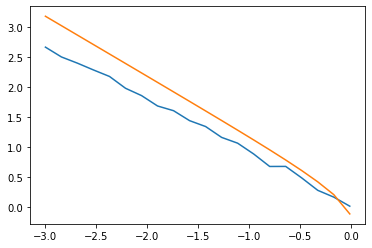

In [50]:
plt.plot(np.log10(pVal), np.log10(stepL3))
plt.plot(np.log10(pVal),  np.log10(stepAvg3))

In [12]:
stepAvg2

array([ 1.90695168e+03,  1.24702523e+03,  8.12095475e+02,  5.26353925e+02,
        3.39289839e+02,  2.17315255e+02,  1.38144059e+02,  8.70246051e+01,
        5.42184043e+01,  3.33154528e+01,  2.01105312e+01,  1.18551007e+01,
        6.76028366e+00,  3.66740764e+00,  1.83016755e+00,  7.70990566e-01,
        1.86620417e-01, -1.13729607e-01, -2.48730973e-01, -2.91153216e-01])

In [13]:
#eStepL, eDistL = scanProbEmission(numRuns = 1000, probOfTrap = 0)

In [14]:

# # plt.plot(np.log10(pVal), np.log10(eDistL))

In [15]:
# plt.plot(np.log10(pVal), np.log10(eStepL))

In [16]:
plt.plot(np.log10(pVal), np.log10(stepL))
plt.plot(np.log10(pVal),  np.log10(stepAvg))

NameError: name 'stepL' is not defined

In [ ]:
plt.plot(np.log10(pVal), np.log10(distL))

In [ ]:
stepAvg

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x = np.array(np.log10(pVal)).reshape((-1, 1))
dist = np.array(np.log10(distL))
steps = np.array(np.log10(stepL))

In [ ]:
linFit = LinearRegression()

In [ ]:
linFit.fit(x,dist)
print(linFit.score(x,dist), linFit.intercept_, linFit.coef_)

In [ ]:
linFit.fit(x, steps)
print(linFit.score(x,steps), linFit.intercept_, linFit.coef_)

In [ ]:
np.histogram(stepL)

1. We could do more general N dimensions/compare it 
2. Heat map 2d of particle travel distance
3. emission as well as absorption as a walker destruction method
4. how many runs do you need 
5. We could also add line of fit and calculate eqn from slope of log log plot
6. Connect to diffusion
7. Trapping death prob non-1
8. p of return to origin
9. How much overlapping vs non - overlapping occurs


1. Start at origin
Repeat Process:
2. Step 1 unit step in any direction (6 choices)
3. You check whether that directions a trap (trap generated w/ prob p unless that cell is a "safe cell")
4. If its not a trap then you add that cell to a dictionary of "safe cells"
5. if its not a trap repeat
6. If it is a trap end and return distance and steps traveled.



In [ ]:
# steps 